Stock Prices Prediction Using Machine Learning and Deep Learning Techniques (with Python codes)

Understanding the Problem Statement
We’ll dive into the implementation part of this article soon, but first it’s important to establish what we’re aiming to solve. Broadly, stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.
Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.
As you might have guessed, our focus will be on the technical analysis part. We’ll be using a dataset from Quandl (you can find historical data for various stocks here) and for this particular project, I have used the data for ‘Tata Global Beverages’. Time to dive in!

Note: Here is the dataset I used for the code: Download

We will first load the dataset and define the target variable for the problem:

In [2]:
#predicting stock market price 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head(10)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


In [35]:
np.__version__

'1.16.2'

There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

1.The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
2.High, Low and Last represent the maximum, minimum, and last price of the share for the day.
3.Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.

Another important thing to note is that the market is closed on weekends and public holidays.Notice the above table again, some date values are missing – 2/10/2018, 6/10/2018, 7/10/2018. Of these dates, 2nd is a national holiday while 6th and 7th fall on a weekend.

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

In [4]:
#close is target

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


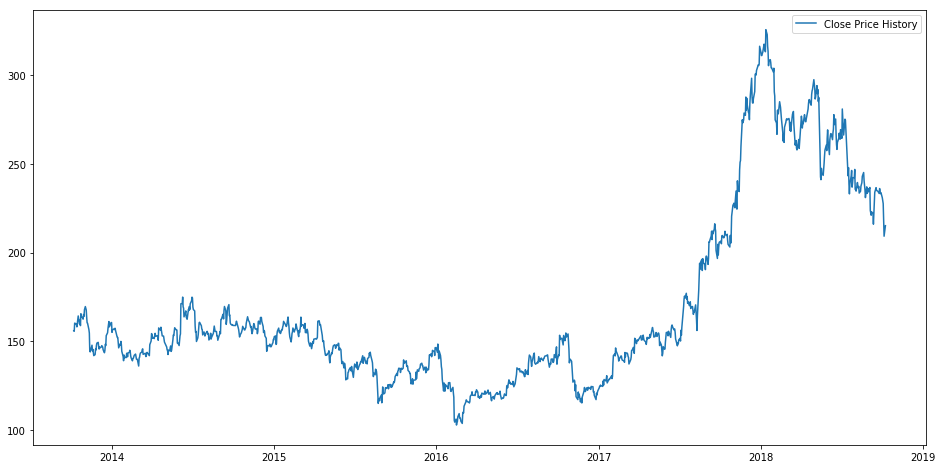

In [5]:
#plot
from pandas.plotting import register_matplotlib_converters #suggested by error msg
register_matplotlib_converters()#suggested by error msg
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price History')
plt.legend()

1.Linear Regression Introduction

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

The equation for linear regression can be written as:
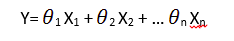

Here, x1, x2,….xn represent the independent variables while the coefficients θ1, θ2, …. θn  represent the weights. You can refer to the following article to study linear regression in more detail:

Implementation:

We will first sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data.

In [6]:
#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=data.index,
                       columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data['Date'][i]= data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
new_data.head()

,Date,Close
Date,,
2013-10-08,2013-10-08 00:00:00,155.8
2013-10-09,2013-10-09 00:00:00,155.55
2013-10-10,2013-10-10 00:00:00,160.15
2013-10-11,2013-10-11 00:00:00,160.05
2013-10-14,2013-10-14 00:00:00,159.45


In [7]:
#!pip install fastai
#create features
from fastai.tabular import  add_datepart
add_datepart(new_data, 'Date')
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,
2013-10-08,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,1381190400
2013-10-09,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,1381276800
2013-10-10,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,1381363200
2013-10-11,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1381449600
2013-10-14,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1381708800


In [8]:
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
new_data.head()
#If the day of week is equal to 0 or 4, the column value will be 1, otherwise 0. 
#Similarly, you can create multiple features. If you have some ideas for features that can be helpful in predicting stock price,
#please share in the comment section.

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
Date,,,,,,,,,,,,,
2013-10-08,155.8,2013,10,41,8,1,281,False,False,False,False,False,False
2013-10-09,155.55,2013,10,41,9,2,282,False,False,False,False,False,False
2013-10-10,160.15,2013,10,41,10,3,283,False,False,False,False,False,False
2013-10-11,160.05,2013,10,41,11,4,284,False,False,False,False,False,False
2013-10-14,159.45,2013,10,42,14,0,287,False,False,False,False,False,False


In [9]:
#We will now split the data into train and validation sets to check the performance of the model
new_data.shape


(1235, 13)

In [10]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']



In [11]:
#Model 1.linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
#make predictions and find the rmse
preds = model.predict(x_valid)
preds

array([148.415375, 148.6065  , 148.797625, 148.98875 , ..., 148.662677, 148.853803, 149.044928, 147.994268])

In [13]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

121.16382449873996

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


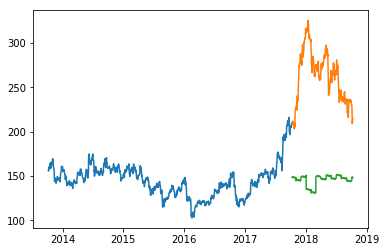

In [14]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


In [15]:
#Inference of Linear Regression in Time Series prediction

#linear regression is more useful for regression problems that are Seasonal in nature like 
#big Mart Sales

#Hence not ideal for continuous value predictions like
#stock market analysis

"""here in the above plot you can see that the prediction 
for january 2018 is matched to january 2016 drop. Hence its seasonal in nature
"""

'here in the above plot you can see that the prediction \nfor january 2018 is matched to january 2016 drop. Hence its seasonal in nature\n'

2.k-Nearest Neighbours

Introduction

Another interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points. Let me explain this with a simple example.

Consider the height and age for 11 people. On the basis of given features (‘Age’ and ‘Height’), the table can be represented in a graphical format as shown below:

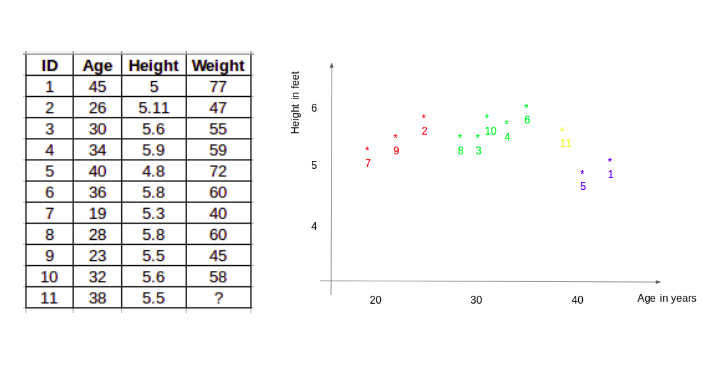




To determine the weight for ID #11, kNN considers the weight of the nearest neighbors of this ID. The weight of ID #11 is predicted to be the average of it’s neighbors. If we consider three neighbours (k=3) for now, the weight for ID#11 would be = (77+72+60)/3 = 69.66 kg.

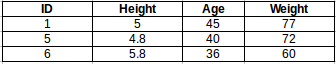

In [16]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
#scaling data

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_train.head()

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.818182,0.769231,0.233333,0.166667,0.769231,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.818182,0.769231,0.266667,0.333333,0.771978,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.818182,0.769231,0.300000,0.500000,0.774725,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.818182,0.769231,0.333333,0.666667,0.777473,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.818182,0.788462,0.433333,0.000000,0.785714,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)
x_valid.head()

D:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.818182,0.784314,0.266667,0.00,0.776243,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.818182,0.784314,0.300000,0.25,0.779006,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.818182,0.784314,0.333333,0.50,0.781768,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.818182,0.784314,0.366667,0.75,0.784530,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.818182,0.784314,0.400000,1.00,0.787293,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [20]:
#fit the model and make predictions
model.fit(x_train, y_train)
preds=model.predict(x_valid)
preds

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([158.79000000000002, 153.65, 156.01000000000002, 160.95, ..., 207.14000000000001, 180.81, 172.20999999999998,
       191.46999999999997], dtype=object)

In [21]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

114.820692914522

There is not a huge difference in the RMSE value, but a plot for the predicted and actual values should provide a more clear understanding.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


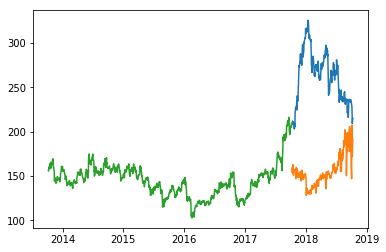

In [22]:
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train[['Close']])

Inference
The RMSE value is almost similar to the linear regression model and the plot shows the same pattern. Like linear regression, kNN also identified a drop in January 2018 since that has been the pattern for the past years. We can safely say that regression algorithms have not performed well on this dataset.

Let’s go ahead and look at some time series forecasting techniques to find out how they perform when faced with this stock prices prediction challenge.

 

In [23]:
#!pip install pmdarima

In [24]:
from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [25]:
train = data[:987]
valid = data[987:]

train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [26]:
training = train['Close']
validation = valid['Close']
training.head()

Date
2013-10-08    155.80
2013-10-09    155.55
2013-10-10    160.15
2013-10-11    160.05
2013-10-14    159.45
Name: Close, dtype: float64

In [27]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4820.561, BIC=4844.968, Fit time=5.867 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5479.245, BIC=5489.008, Fit time=0.072 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5170.275, BIC=5189.801, Fit time=1.175 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4818.530, BIC=4838.055, Fit time=4.095 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4816.433, BIC=4840.840, Fit time=3.060 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=5170.275, BIC=5189.801, Fit time=1.202 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4818.339, BIC=4847.628, Fit time=14.947 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5481.156, BIC=5495.800, Fit time=0.256 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=4818.604, BIC=4852.774, Fit time=13.175 seconds
Fit ARIMA: order=(1, 1, 1)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [28]:
forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [29]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

44.95517637138125

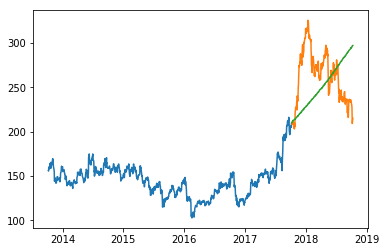

In [30]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

Inference

As we saw earlier, an auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. Although the predictions using this technique are far better than that of the previously implemented machine learning models, these predictions are still not close to the real values.

As its evident from the plot, the model has captured a trend in the series, but does not focus on the seasonal part. In the next section, we will implement a time series model that takes both trend and seasonality of a series into account.

4. Prophet

Introduction
There are a number of time series techniques that can be implemented on the stock prediction dataset, but most of these techniques require a lot of data preprocessing before fitting the model. Prophet, designed and pioneered by Facebook, is a time series forecasting library that requires no data preprocessing and is extremely simple to implement. The input for Prophet is a dataframe with two columns: date and target (ds and y).

Prophet tries to capture the seasonality in the past data and works well when the dataset is large. Here is an interesting article that explains Prophet in a simple and intuitive manner:

In [31]:
#importing prophet
#!pip install fbprophet
from fbprophet import Prophet




ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [32]:
#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:987]
valid = new_data[987:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [33]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

56.93496825202469

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


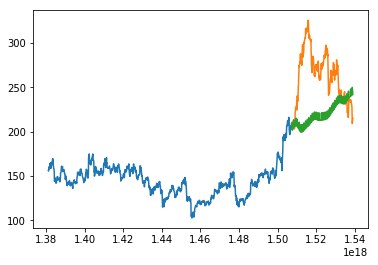

In [34]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

Inference

Prophet (like most time series forecasting techniques) tries to capture the trend and seasonality from past data. This model usually performs well on time series datasets, but fails to live up to it’s reputation in this case.

As it turns out, stock prices do not have a particular trend or seasonality. It highly depends on what is currently going on in the market and thus the prices rise and fall. Hence forecasting techniques like ARIMA, SARIMA and Prophet would not show good results for this particular problem.

Let us go ahead and try another advanced technique – Long Short Term Memory (LSTM).

5. Long Short Term Memory (LSTM)

Introduction
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

The input gate: The input gate adds information to the cell state
The forget gate: It removes the information that is no longer required by the model
The output gate: Output Gate at LSTM selects the information to be shown as output
For a more detailed understanding of LSTM and its architecture, you can go through the below article: